# Time Series

In [650]:
import pandas as pd

## Gas Prices

The U.S. Bureau of Labor Statistics makes available a lot of economic time series data. For example, [this site contains monthly data on the U.S. city average price of one gallon of unleaded gasoline](https://data.bls.gov/timeseries/APU000074714). Go to the site, change the "From" box to the earliest year data is available (should be 1976), hit Go, and then download the xlsx spreadsheet.

(The BLS does provide an API along with some [helpful sample code](https://www.bls.gov/developers/api_python.htm#python2) but instead of using the API, we'll take this as an opportunity to read in Excel spreadsheets using Pandas.)

1\. Upload the downloaded Excel file to your Colab session storage (click the folder icon on the left, etc), and then read in the file using the Pandas command [`read_excel`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html). Hint: if you open the Excel file, you'll notice that the first 9 rows only contain descriptive information about the data set; use the `skiprows` argument to ignore these rows.

In [651]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df = pd.read_excel('series.xlsx', engine='openpyxl', skiprows=9)
df.head()

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1976,0.605,0.600,0.594,0.592,0.600,0.616,0.623,0.628,0.630,0.629,0.629,0.626
1,1977,0.627,0.637,0.643,0.651,0.659,0.665,0.667,0.667,0.666,0.665,0.664,0.665
2,1978,0.648,0.647,0.647,0.649,0.655,0.663,0.674,0.682,0.688,0.690,0.695,0.705
3,1979,0.716,0.730,0.755,0.802,0.844,0.901,0.949,0.988,1.020,1.028,1.041,1.065
4,1980,1.131,1.207,1.252,1.264,1.266,1.269,1.271,1.267,1.257,1.250,1.250,1.258


2\. Notice that there is a separate column for each month, and a row only for each year. This data set is in **wide format**. We want to convert it to **long format**, so that each row correponds to a different month and year. Use Pandas [`melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert the data to long format.

Note: at some point you might want to sort the dates, but don't do that yet; we'll come back to it in a few steps.

Aside: earlier in the quarter we used `unstack` to convert from long to wide format.

(The BLS site does allow you to retrieve the data in either wide or long format, but we'll take the opportunity to see how to convert it with Pandas.)

In [652]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df = df.melt(id_vars=['Year'], var_name='Month', value_name='Sales')
df.head()

,Year,Month,Sales
0,1976,Jan,0.605
1,1977,Jan,0.627
2,1978,Jan,0.648
3,1979,Jan,0.716
4,1980,Jan,1.131


3\. Year and month should now be in separate columns. Combine them into a single Pandas `datetime` column called "date". Hints: One way to do this is to create a string with year/month and month/day separated by "/", i.e., "yyyy/mm/dd", and then convert the string `to_datetime`. This is monthly data, but you'll need to provide a day; you can just use "01".

Note: you might want to set date as the index, but don't do that quite yet; we'll do it a few steps down.

In [653]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
df.head()

,Year,Month,Sales,Date
0,1976,Jan,0.605,1976-01-01
1,1977,Jan,0.627,1977-01-01
2,1978,Jan,0.648,1978-01-01
3,1979,Jan,0.716,1979-01-01
4,1980,Jan,1.131,1980-01-01


4\. As an example of what NOT to do, create a line plot of price. Does the plot look reasonable? What do you think is wrong?

<Axes: title={'center': 'Sales over time'}, xlabel='Date'>

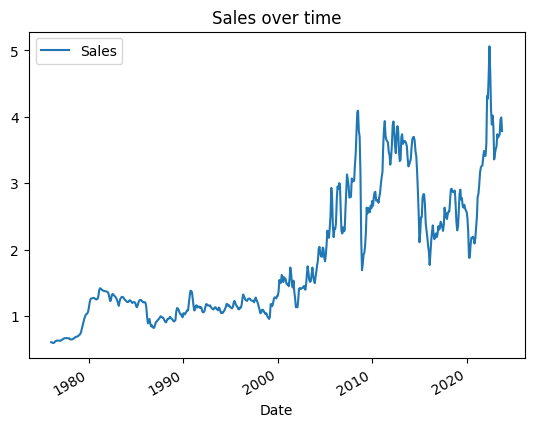

In [654]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df.plot(x='Date', y='Sales', title='Sales over time')

5\. Set date as the index, but don't sort the values yet, and redo the line plot. Did you correct the problem from the previous part?

<Axes: title={'center': 'Sales over time'}, xlabel='Date'>

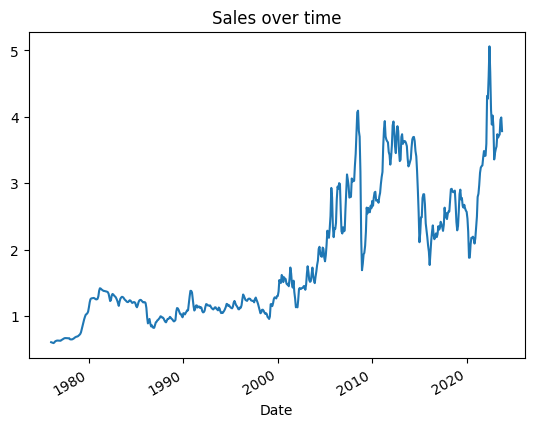

In [655]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df.set_index('Date', inplace=True)

df["Sales"].plot(title="Sales over time")

6\. Now use `sort_index()` to put the dates in order and redo the line plot. You should see the same plot from the previous part (though the axis labels might be a little different). Now examine the plot in context. What does this plot tell you about the price of gas over time? Is there anything else to consider?

<Axes: title={'center': 'Sales over time'}, xlabel='Date'>

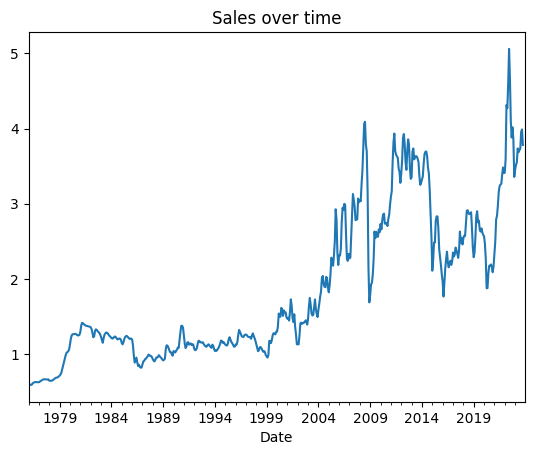

In [656]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df.sort_index(inplace=True)

df["Sales"].plot(title="Sales over time")

In [657]:
df.head()

,Year,Month,Sales
Date,,,
1976-01-01,1976,Jan,0.605
1976-02-01,1976,Feb,0.600
1976-03-01,1976,Mar,0.594
1976-04-01,1976,Apr,0.592
1976-05-01,1976,May,0.600


## Adjusting for Inflation

- When analyzing monetary data over many years, it's important to adjust prices/values for inflation.
This enables monetary values to be compared in a meaningful way, in terms of the actual purchasing power of the amounts at the times. (For example, \\$100 was worth considerably more, in terms of what it could buy, in 1980 than \\$100 is worth today.)
- The common mechanism for making such adjustments is the **Consumer Price Index (CPI)**, calculated every month the [U.S. Bureau of Labor Statistics (BLS)](https://www.bls.gov/cpi/).
- The CPI measures changes in the prices of a "market basket" of goods and services over time, thereby enabling us to draw comparisons between the real buying power of monetary amounts at different times.
- The CPI is an *index* number, so it describes percentage change from a base value.
- The CPI is by no mean a perfect measure of buying power.
    - It only applies to Americans who live in somewhat urban areas.
    - The "market basket" probably differs from goods and services that you purchase, although it is based on extensive surveys of Americans' buying patterns
    - It takes averages of prices across a variety of store types in about 85 cities, but it cannot provide prices for exactly where you live.
- To convert an amount in dollars at time A to an amount with the same buying power at time B, multiply the original amount by the ratio of the CPI values:
$$
\text{dollars at time B} = \text{dollars at time A}\times\frac{\text{CPI at time B}}{\text{CPI at time A}}
$$
This process is known as converting from "current dollars" to "constant dollars", or "adjusting for inflation".


## Adjusted Gas Prices



1\. The [BLS maintains historical data on CPI for each month](https://data.bls.gov/timeseries/CUUR0000SA0). Repeat the steps that you carried out for the gas price data to read the data into Pandas and properly format the date as a `datetime`. Hint: You can drop the "HALF1", "HALF2" columns.

In [658]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df_cpi = pd.read_excel('cpi.xlsx', engine='openpyxl', skiprows=11)
df_cpi.drop(columns=['HALF1', 'HALF2'], inplace=True)

# make into long format
df_cpi = df_cpi.melt(id_vars=['Year'], var_name='Month', value_name='CPI')

# convert to datetime
df_cpi['Date'] = pd.to_datetime(df_cpi['Year'].astype(str) + '-' + df_cpi['Month'].astype(str) + '-01')

# set index
df_cpi.set_index('Date', inplace=True)

# sort index
df_cpi.sort_index(inplace=True)

df_cpi.head()


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Month,CPI
Date,,,
1976-01-01,1976,Jan,55.6
1976-02-01,1976,Feb,55.8
1976-03-01,1976,Mar,55.9
1976-04-01,1976,Apr,56.1
1976-05-01,1976,May,56.5


2\. Now join the gas price and CPI data sets, and compute the inflation adjusted gas prices, converted to current dollars.

In [659]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

# join the two dataframes
df = df.join(df_cpi, on='Date', rsuffix='_cpi')

df['Sales_adj'] = df['Sales'] * (df['CPI'].loc["2023-10-01"] / df['CPI'])
df.head()

,Year,Month,Sales,Year_cpi,Month_cpi,CPI,Sales_adj
Date,,,,,,,
1976-01-01,1976,Jan,0.605,1976,Jan,55.6,3.347859
1976-02-01,1976,Feb,0.600,1976,Feb,55.8,3.308290
1976-03-01,1976,Mar,0.594,1976,Mar,55.9,3.269348
1976-04-01,1976,Apr,0.592,1976,Apr,56.1,3.246724
1976-05-01,1976,May,0.600,1976,May,56.5,3.267303


3\. Make a plot of inflation adjusted dollars, and describe what you see in context. When was gas the cheapest? Most expensive?

<Axes: title={'center': 'Sales over time (inflation adjusted)'}, xlabel='Date'>

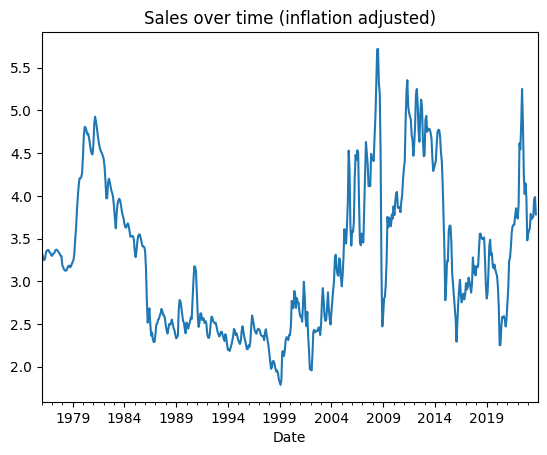

In [660]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df['Sales_adj'].plot(title='Sales over time (inflation adjusted)')

In [661]:
# find cheapest year
df.groupby("Date")['Sales_adj'].mean().sort_values().head(1)

Date
1999-02-01    1.786175
Name: Sales_adj, dtype: float64

In [662]:
# find most expensive year
df.groupby("Date")['Sales_adj'].mean().sort_values(ascending=False).head(1)

Date
2008-07-01    5.72082
Name: Sales_adj, dtype: float64

## Austin Weather

The Austin weather data set (https://dlsun.github.io/pods/data/austin_weather_2019.csv ) contains hourly measurements of the weather in Austin, TX in 2019. This data set was collected from the [NOAA](https://www.ncdc.noaa.gov/crn/qcdatasets.html). See the [data documentation](https://www1.ncdc.noaa.gov/pub/data/uscrn/products/hourly02/README.txt) for more information.

1\. Read in the data set. The date of the measurement is contained in **LST_DATE**, the time in **LST_TIME**, and the  Plot the hourly temperature (degrees Celsisu) in **T_HR_AVG**. Convert the date and time columns into a single Pandas `datetime` and set that column as the index.

In [663]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df_weather = pd.read_csv("https://dlsun.github.io/pods/data/austin_weather_2019.csv")
df_weather.head()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,CRX_VN,LONGITUDE,LATITUDE,T_CALC,T_HR_AVG,...,SOIL_MOISTURE_5,SOIL_MOISTURE_10,SOIL_MOISTURE_20,SOIL_MOISTURE_50,SOIL_MOISTURE_100,SOIL_TEMP_5,SOIL_TEMP_10,SOIL_TEMP_20,SOIL_TEMP_50,SOIL_TEMP_100
0,23907,20190101,100,20181231,1900,2.623,-98.08,30.62,12.6,12.7,...,0.508,0.500,-99.0,-99.0,-99.0,10.0,10.1,-9999.0,-9999.0,-9999.0
1,23907,20190101,200,20181231,2000,2.623,-98.08,30.62,11.1,11.6,...,0.507,0.496,-99.0,-99.0,-99.0,9.8,9.9,-9999.0,-9999.0,-9999.0
2,23907,20190101,300,20181231,2100,2.623,-98.08,30.62,11.8,12.0,...,0.506,0.493,-99.0,-99.0,-99.0,9.6,9.7,-9999.0,-9999.0,-9999.0
3,23907,20190101,400,20181231,2200,2.623,-98.08,30.62,12.0,11.9,...,0.503,0.490,-99.0,-99.0,-99.0,9.3,9.6,-9999.0,-9999.0,-9999.0
4,23907,20190101,500,20181231,2300,2.623,-98.08,30.62,11.4,11.4,...,0.501,0.489,-99.0,-99.0,-99.0,9.1,9.4,-9999.0,-9999.0,-9999.0


In [664]:
df_weather['LST_DATE'] = df_weather['LST_DATE'].astype(str)
df_weather['LST_TIME'] = df_weather['LST_TIME'].astype(str)

df_weather['LST_DATE'] = df_weather['LST_DATE'].str.pad(8, side='left', fillchar='0')
df_weather['LST_TIME'] = df_weather['LST_TIME'].str.pad(4, side='left', fillchar='0')


df_weather['Date'] = pd.to_datetime(df_weather['LST_DATE'] + df_weather['LST_TIME'], format='%Y%m%d%H%M')

df_weather.head()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,CRX_VN,LONGITUDE,LATITUDE,T_CALC,T_HR_AVG,...,SOIL_MOISTURE_10,SOIL_MOISTURE_20,SOIL_MOISTURE_50,SOIL_MOISTURE_100,SOIL_TEMP_5,SOIL_TEMP_10,SOIL_TEMP_20,SOIL_TEMP_50,SOIL_TEMP_100,Date
0,23907,20190101,100,20181231,1900,2.623,-98.08,30.62,12.6,12.7,...,0.500,-99.0,-99.0,-99.0,10.0,10.1,-9999.0,-9999.0,-9999.0,2018-12-31 19:00:00
1,23907,20190101,200,20181231,2000,2.623,-98.08,30.62,11.1,11.6,...,0.496,-99.0,-99.0,-99.0,9.8,9.9,-9999.0,-9999.0,-9999.0,2018-12-31 20:00:00
2,23907,20190101,300,20181231,2100,2.623,-98.08,30.62,11.8,12.0,...,0.493,-99.0,-99.0,-99.0,9.6,9.7,-9999.0,-9999.0,-9999.0,2018-12-31 21:00:00
3,23907,20190101,400,20181231,2200,2.623,-98.08,30.62,12.0,11.9,...,0.490,-99.0,-99.0,-99.0,9.3,9.6,-9999.0,-9999.0,-9999.0,2018-12-31 22:00:00
4,23907,20190101,500,20181231,2300,2.623,-98.08,30.62,11.4,11.4,...,0.489,-99.0,-99.0,-99.0,9.1,9.4,-9999.0,-9999.0,-9999.0,2018-12-31 23:00:00


2\. Create a line plot of temperature over time. Notice any problems? Why do you think this occurs?

<Axes: title={'center': 'Temperature over time'}, xlabel='Date'>

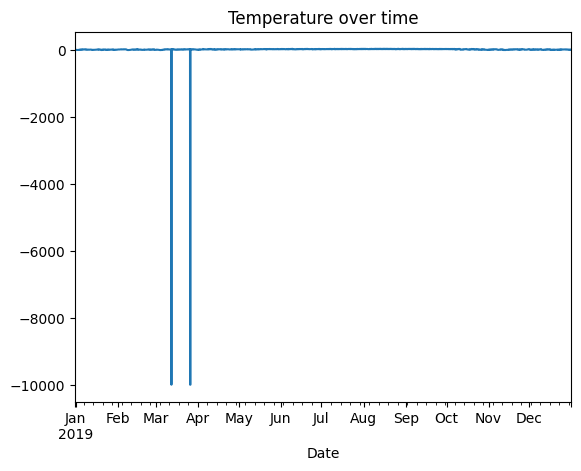

In [665]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df_weather.set_index('Date', inplace=True)

df_weather["T_HR_AVG"].plot(title="Temperature over time")

3\. Fix the missing values and redo the line plot. Describe what you see.

<Axes: title={'center': 'Temperature over time'}, xlabel='Date'>

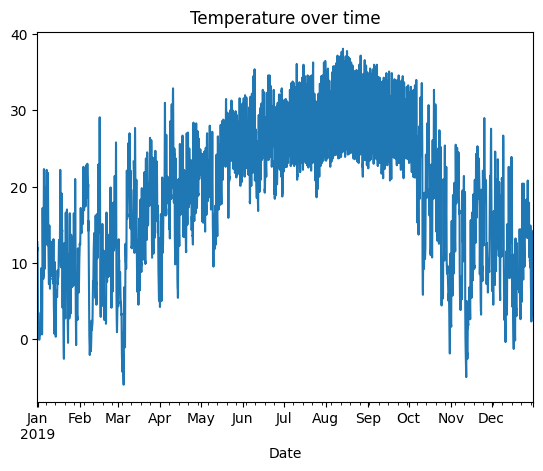

In [666]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df_weather[df_weather["T_HR_AVG"] == df_weather["T_HR_AVG"].min()]

import numpy as np
df_weather["T_HR_AVG"].replace(-9999, np.nan, inplace=True)

# plot the hourly average temperature
df_weather["T_HR_AVG"].plot(title="Temperature over time")


4\. The hourly temperature plot is extremely noisy. Plot the daily average temperature, and then the weekly average temperature. What is the advantage of these plots?

<Axes: title={'center': 'Daily average temperature'}, xlabel='Date'>

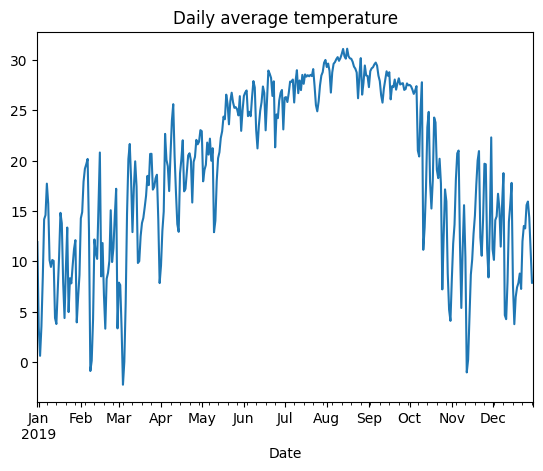

In [667]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

df_weather["T_HR_AVG"].resample('D').mean().plot(title="Daily average temperature")

<Axes: title={'center': 'Weekly average temperature'}, xlabel='Date'>

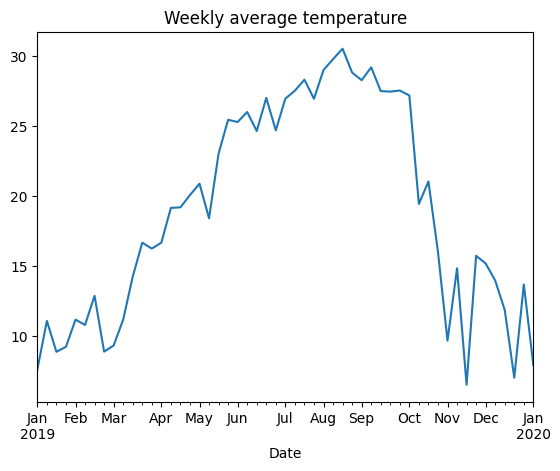

In [668]:
df_weather["T_HR_AVG"].resample('W').mean().plot(title="Weekly average temperature")

5\. Model the overall trend using a polynomial. Create a plot of the hourly data with the trend superimposed. Hint: you'll need to convert datetimes to decimal like in the reading, but now we're dealing with hourly data.

In [669]:
# dropping na values
df_weather.isna().sum()

df_weather.dropna(inplace=True)

df_weather.isna().sum()

y_train = df_weather["T_HR_AVG"]

In [670]:
y_train.shape

(8752,)

In [671]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

# model overall trend using a polynomial. Create a plot of the hourly data with the trend superimposed.
# will need to convert datetimes to decimal, but now we are dealing with hourly data, so we need to convert to decimal hours

date = df_weather.index
t = date.year + ((30 * (date.month - 1) + date.day) / 365) + ((date.hour / 24) / 365)
t

Index([ 2018.991210045662, 2018.9913242009131, 2018.9914383561643,
       2018.9915525114154, 2018.9916666666666, 2019.0027397260274,
       2019.0028538812785, 2019.0029680365296, 2019.0030821917808,
        2019.003196347032,
       ...
       2019.9900684931506, 2019.9901826484017, 2019.9902968036529,
        2019.990410958904, 2019.9905251141552, 2019.9906392694063,
       2019.9907534246574, 2019.9908675799086, 2019.9909817351597,
       2019.9910958904109],
      dtype='float64', name='Date', length=8752)

In [672]:
t.to_frame().shape

(8752, 1)

In [673]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(t.to_frame())

array([[2.01899121e+03, 4.07632551e+06],
       [2.01899132e+03, 4.07632597e+06],
       [2.01899144e+03, 4.07632643e+06],
       ...,
       [2.01999087e+03, 4.08036311e+06],
       [2.01999098e+03, 4.08036357e+06],
       [2.01999110e+03, 4.08036403e+06]])

<Axes: title={'center': 'Temperature over time (with trend)'}, xlabel='Date'>

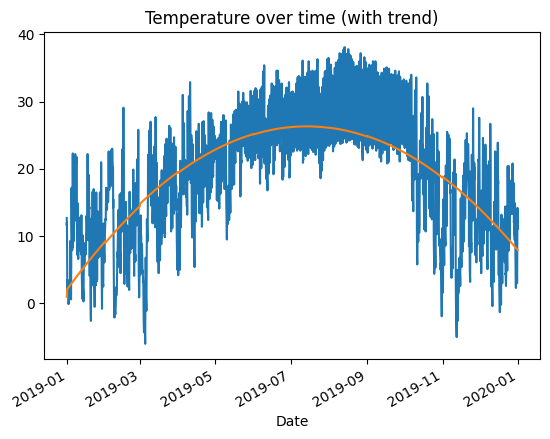

In [674]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

pipeline.fit(t.to_frame(), y_train)

y_train_ = pd.Series(
    pipeline.predict(t.to_frame()),
    index=y_train.index
)

y_train.plot.line(title="Temperature over time")
y_train_.plot.line(title="Temperature over time (with trend)")


6\. Use your model to forecast the average temperature on January 1, 2020 at midnight in Austin, TX.

In [675]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

t_pred = pd.Series([2020 + (30 * (1 - 1) + 1 / 365 + 0 / 24)])
t_pred

y_pred = pipeline.predict(t_pred.to_frame())
y_pred


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([6.99152768])

7\. Now fit a model that includes both the polynomial trend and a seasonal component for the daily fluctuations in temperature. Create a plot of the hourly data with the trend superimposed.

<Axes: xlabel='Date'>

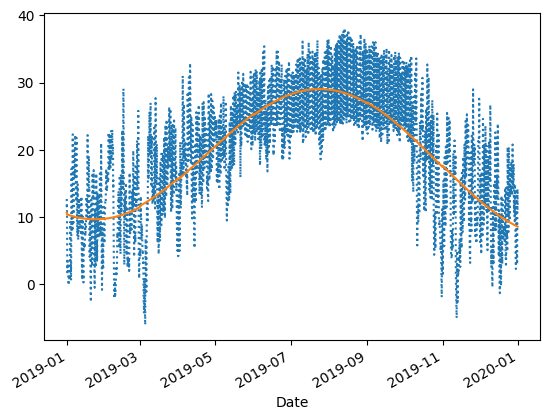

In [678]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union

# Fit linear regression on t, t^2, sin(2 * pi * t), cos(2 * pi * t)
pipeline = make_pipeline(
    make_union(
        PolynomialFeatures(degree=2, include_bias=False),
        FunctionTransformer(lambda t: np.sin(2 * np.pi * 1 * t)),
        FunctionTransformer(lambda t: np.cos(2 * np.pi * 1 * t))
    ),
    LinearRegression()
)
pipeline.fit(X=t.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    pipeline.predict(t.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line(style=":")
y_train_.plot.line()

8\. Use the revised model to forecast the average temperature on January 1, 2020 at midnight in Austin, TX.

In [679]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

# use revised model to predict temperature for 2020-01-01 at midnight

pipeline.predict(t_pred.to_frame())

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([8.22728548])